# Evaluation Summary

# Preparation

In [ ]:
%pip install -r ../requirements.txt

In [29]:
import sys, os
sys.path.append(os.path.abspath("../"))

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from core.utils import load_algo, load_cv, load_gscv, CV_FOLDS
from api.model import recommend_top_k

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## RMSE Comparisons

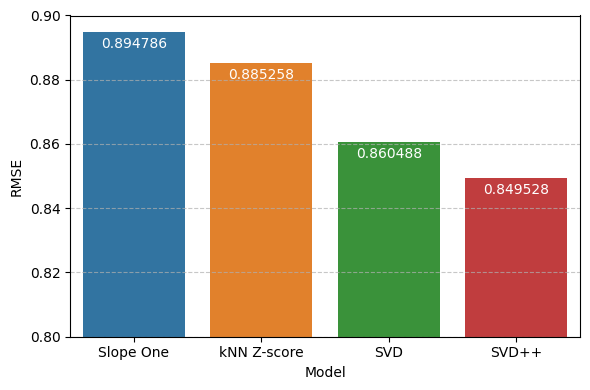

In [42]:
cv_slope_one = load_cv('cv_slope_one')
cv_knn_zscore = load_cv('cv_knn_zscore')
cv_svd = load_cv('cv_svd')
cv_svdpp = load_cv('cv_svdpp')

rmse_data = [
    cv_slope_one['test_rmse'].mean(),
    cv_knn_zscore['test_rmse'].mean(),
    cv_svd['test_rmse'].mean(),
    cv_svdpp['test_rmse'].mean(),
]

rmse_df = pd.DataFrame({
    'model': ['Slope One', 'kNN Z-score', 'SVD', 'SVD++'],
    'rmse': rmse_data,
})

plt.figure(figsize=(6, 4))
sns.barplot(data=rmse_df, x='model', y='rmse', hue='model', legend=False)

for index, row in rmse_df.iterrows():
    plt.text(
        index,
        row['rmse'] - 0.005,
        f"{row['rmse']:.6f}",
        color='white',
        ha='center',
    )

plt.title('')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0.8, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## F1-score Comparisons

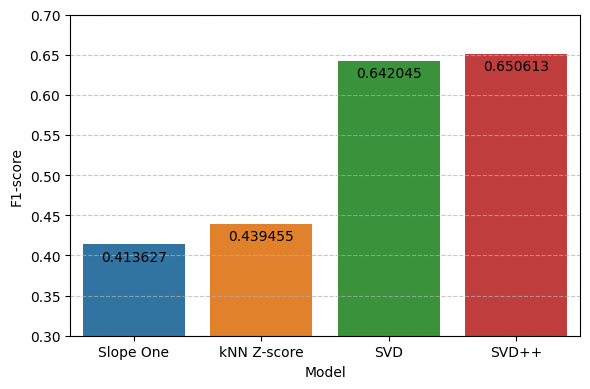

In [41]:
cv_slope_one = load_cv('cv_slope_one')
cv_knn_zscore = load_cv('cv_knn_zscore')
cv_svd = load_cv('cv_svd')
cv_svdpp = load_cv('cv_svdpp')

f1_data = [
    np.mean(cv_slope_one['test_f1']),
    np.mean(cv_knn_zscore['test_f1']),
    np.mean(cv_svd['test_f1']),
    np.mean(cv_svdpp['test_f1']),
]

f1_df = pd.DataFrame({
    'model': ['Slope One', 'kNN Z-score', 'SVD', 'SVD++'],
    'f1': f1_data,
})

plt.figure(figsize=(6, 4))
sns.barplot(data=f1_df, x='model', y='f1', hue='model', legend=False)

for index, row in f1_df.iterrows():
    plt.text(
        index,
        row['f1'] - 0.02,
        f"{row['f1']:.6f}",
        color='white',
        ha='center',
    )

plt.title('')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.ylim(0.3, 0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
